In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_data_df = pd.read_excel("default of credit card clients.xls",index_col=0,skiprows=[0])

In [3]:
credit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [4]:
credit_data_df.head().T

ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0
PAY_5,-2,0,0,0,0


In [5]:
credit_data_df.rename(columns={"default payment next month": "Is_Default"},inplace=True)

In [6]:
credit_data_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Is_Default'],
      dtype='object')

# EDA

In [7]:
## Distribution of target class
credit_data_df["Is_Default"].value_counts()

0    23364
1     6636
Name: Is_Default, dtype: int64

In [8]:
(credit_data_df["Is_Default"].value_counts(normalize = True))

0    0.7788
1    0.2212
Name: Is_Default, dtype: float64

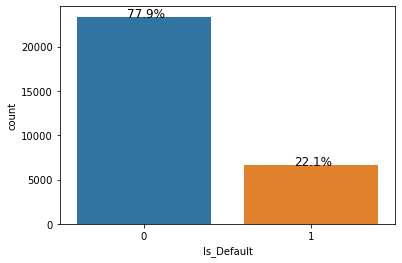

In [9]:
ax = sns.countplot(x="Is_Default",data= credit_data_df)

#total number of data point
total = credit_data_df.shape[0]

#Calculate the 
for p in ax.patches:#return the details of each rectangle
    percentage = '{:.1f}%'.format(100 * p.get_height() / total) #p.get_height() returns the height of each rectangle
    x = (p.get_x() + p.get_width() / 2 )-0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x, y), size=12)
    #Annotate the point *xy* with text *text*.

for p in ax.patches:
    print("Summary of each bar",p)
    print("X cordinate of each bar",p.get_x())
    print("Y cordinate of each bar",p.get_y())
    print("Height of each bar",p.get_height())
    print("Width of each bar",p.get_width())
    print("\n")

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Count'>

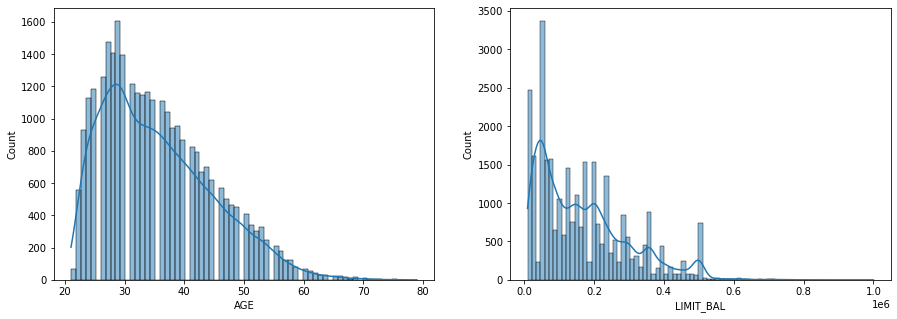

In [10]:
#understanding the distribution of various variables
figure = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='AGE',data=credit_data_df,kde=True)

plt.subplot(1,2,2)
sns.histplot(x="LIMIT_BAL",data=credit_data_df,kde=True)

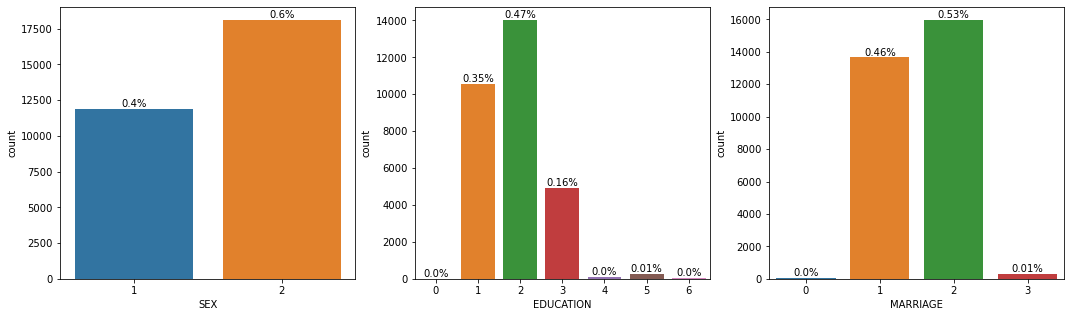

In [11]:
## SEX,EDUCATION,MARRIAGE
figure = plt.figure(figsize=(18,5))
i=0
for var in ['SEX','EDUCATION','MARRIAGE']:
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=var,data=credit_data_df)
    labels_list = list(credit_data_df[var].value_counts(normalize=True).sort_index().values)
    labels_list = list(map((lambda x:str(np.round(x,2))+"%"),labels_list))
    ax.bar_label(container=ax.containers[-1],labels=labels_list,label_type='edge')
    i+=1
    

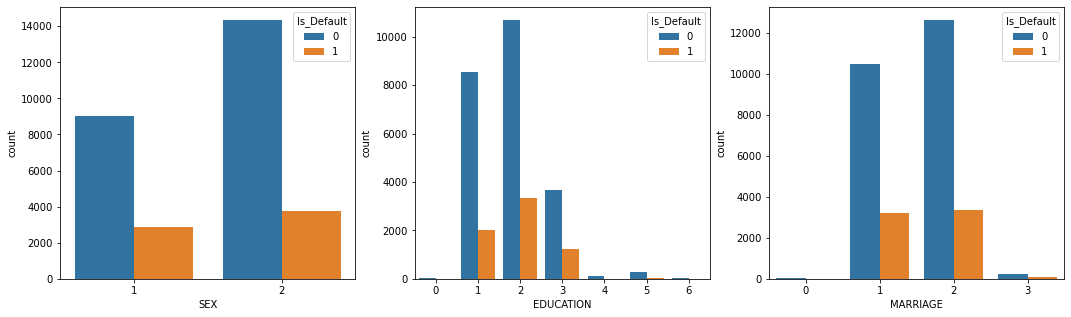

In [12]:
## SEX,EDUCATION,MARRIAGE
figure = plt.figure(figsize=(18,5))
i=0
for var in ['SEX','EDUCATION','MARRIAGE']:
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=var,data=credit_data_df,hue="Is_Default")
#     labels_list = list(credit_data_df[var].value_counts(normalize=True).sort_index().values)
#     labels_list = list(map((lambda x:str(np.round(x,2))+"%"),labels_list))
#     ax.bar_label(container=ax.containers[-1],labels=labels_list,label_type='edge')
    i+=1

## Correlation

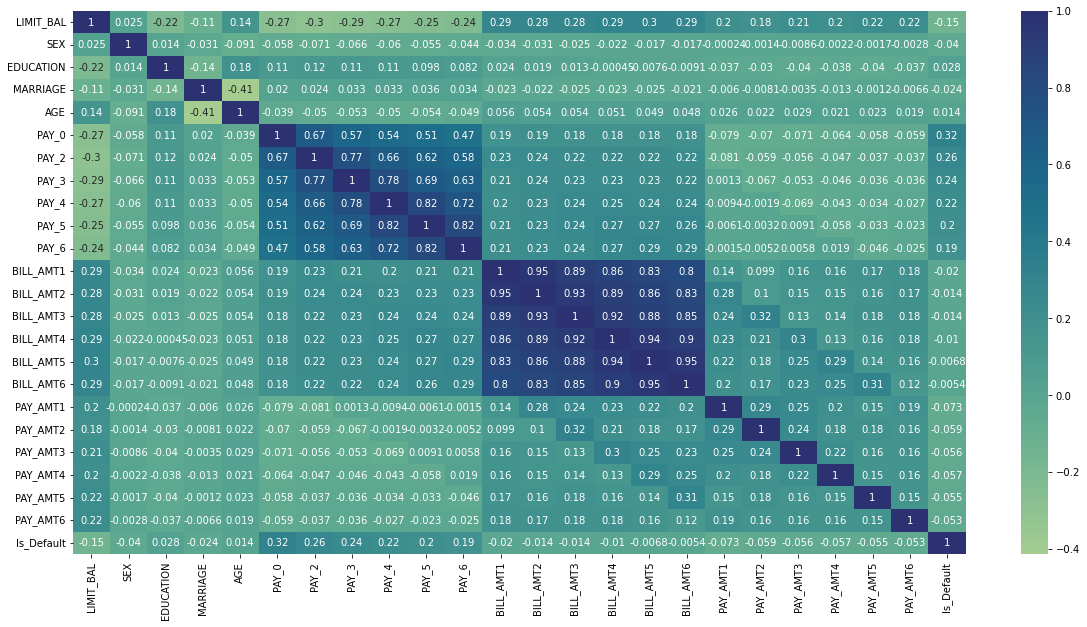

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(data=credit_data_df.corr(),annot=True,cmap='crest')
plt.show()

## Feature Engineering

In [14]:
age_bins = pd.cut(credit_data_df["AGE"],3,labels=['20-40','40-60','60-80'])
credit_data_df["age_bins"] = age_bins

## Data preprocessing

In [15]:
cat_features = ["SEX","EDUCATION","MARRIAGE","age_bins"]
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
ohe = OneHotEncoder()
le = LabelEncoder()

In [16]:
# we shall do one hot encoding for "SEX","EDUCATION","MARRIAGE"
# and
# Label encoding for "AGebins"

ohe_encoded_arr = (ohe.fit_transform(credit_data_df[["SEX","EDUCATION","MARRIAGE"]])).toarray()
ohe_encoded_df = pd.DataFrame(data = ohe_encoded_arr,columns=ohe.get_feature_names_out(), index = credit_data_df.index)

In [17]:
le_encoded_arr = (le.fit_transform(credit_data_df["age_bins"]))
le_encoded_df = pd.DataFrame(data = le_encoded_arr,columns=["age_bins_encoded"], index = credit_data_df.index)

In [18]:
credit_data_df_new = pd.concat([credit_data_df,le_encoded_df,ohe_encoded_df],axis=1)

In [19]:
credit_data_df_new.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Is_Default', 'age_bins', 'age_bins_encoded', 'SEX_1', 'SEX_2',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

## Standardising the data

In [20]:
continuous_features = ['LIMIT_BAL','PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
sc = StandardScaler()
credit_data_df_new[continuous_features] = sc.fit_transform(credit_data_df_new[continuous_features])

In [21]:
y = credit_data_df_new["Is_Default"]

required_featues = continuous_features + ['age_bins_encoded', 'SEX_1', 'SEX_2',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3']

X = credit_data_df_new[required_featues]

### Model building and prediction

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [24]:
log_reg = LogisticRegression(max_iter=2000,solver='saga',random_state=25,class_weight='balanced',penalty='elasticnet',l1_ratio=0.5)
log_reg.fit(X_train,y_train)

C:\Users\nswet\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', l1_ratio=0.5, max_iter=2000,
                   penalty='elasticnet', random_state=25, solver='saga')

In [25]:
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [26]:
confusion_matrix(y_test, y_pred)

array([[3230, 1443],
       [ 487,  840]], dtype=int64)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4673
           1       0.37      0.63      0.47      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000



In [28]:
credit_data_df["Total_bill"] = credit_data_df['BILL_AMT1']+credit_data_df['BILL_AMT2']+credit_data_df['BILL_AMT3']+credit_data_df['BILL_AMT4']+credit_data_df['BILL_AMT5']+credit_data_df['BILL_AMT6']

In [29]:
credit_data_df["Total_paid_amount"] = credit_data_df['PAY_AMT1']+credit_data_df['PAY_AMT2']+credit_data_df['PAY_AMT3']+credit_data_df['PAY_AMT4']+credit_data_df['PAY_AMT5']+credit_data_df['PAY_AMT6']

In [30]:
credit_data_df["Repayment"] = np.round((credit_data_df['PAY_0']+credit_data_df['PAY_2']+credit_data_df['PAY_3']+credit_data_df['PAY_4']+credit_data_df['PAY_5']+credit_data_df['PAY_6'])/6,2)

In [39]:
Repayment_bins = pd.cut(credit_data_df["Repayment"],7,labels=["-2->0","0->1","1->2","2->3","3->4","4->5","5->6"])
credit_data_df["Repayment_bins"] = Repayment_bins

In [40]:
le_encoded_df_temp = pd.DataFrame(data = le.fit_transform(credit_data_df["Repayment_bins"] ),columns=["Repayment_bins_encoded"], index = credit_data_df.index)

In [41]:
credit_data_df_new = pd.concat([credit_data_df_new,le_encoded_df_temp],axis=1)

C:\Users\nswet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Repayment', ylabel='count'>

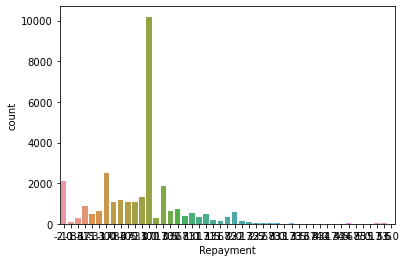

In [37]:
sns.countplot(credit_data_df["Repayment"],hue)

In [31]:
credit_data_df_new[["Total_bill","Total_paid_amount","Repayment"]] = sc.fit_transform(credit_data_df[["Total_bill","Total_paid_amount","Repayment"]])

In [49]:
credit_data_df_new.head().T

ID,1,2,3,4,5
LIMIT_BAL,-1.13672,-0.365981,-0.597202,-0.905498,-0.905498
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,1.794564,-0.874991,0.014861,0.014861,-0.874991
PAY_2,1.782348,1.782348,0.111736,0.111736,0.111736
PAY_3,-0.696663,0.138865,0.138865,0.138865,-0.696663
PAY_4,-0.666599,0.188746,0.188746,0.188746,0.188746
PAY_5,-1.530046,0.234917,0.234917,0.234917,0.234917


In [32]:
continuous_features = ['LIMIT_BAL']

In [44]:
y = credit_data_df_new["Is_Default"]
required_featues = continuous_features + ['age_bins_encoded', 'SEX_1', 'SEX_2',
       'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3']+["Total_bill","Total_paid_amount","Repayment_bins_encoded"]

X = credit_data_df_new[required_featues]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
log_reg = LogisticRegression(max_iter=2000,solver='saga',random_state=25,class_weight='balanced',penalty='elasticnet',l1_ratio=0.5)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)

C:\Users\nswet\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4673
           1       0.37      0.61      0.46      1327

    accuracy                           0.69      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.69      0.71      6000

